In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
df = pd.read_csv("network-logs.csv")
df.head(10)

,REMOTE_PORT,LATENCY,THROUGHPUT,ANOMALY
0,21,15.942875,16.202998,0
1,20,12.666451,15.899084,1
2,80,13.894550,12.958008,0
3,21,13.620813,15.459475,0
4,21,15.705485,15.339565,0
5,23,15.593190,15.612381,0
6,21,15.489068,15.640874,0
7,80,15.527048,15.635680,0
8,21,14.075067,15.765315,0
9,53,12.953650,15.823285,0


In [23]:
# Dimensionnement
df.shape

(405, 4)

In [24]:
# Gestion des valeurs manquantes
df.isna().sum()

REMOTE_PORT    0
LATENCY        0
THROUGHPUT     0
ANOMALY        0
dtype: int64

In [25]:
# Gestion des doublons
doublons = df.drop_duplicates(inplace = True)
print(doublons)

None


In [26]:
df.describe()

,REMOTE_PORT,LATENCY,THROUGHPUT,ANOMALY
count,307.000000,307.000000,307.000000,307.000000
mean,65.019544,14.438806,15.361489,0.029316
std,107.987622,1.506990,1.270218,0.168966
min,20.000000,4.752613,4.126232,0.000000
25%,21.000000,13.403351,15.197528,0.000000
50%,21.000000,15.015778,15.528906,0.000000
75%,80.000000,15.456936,15.841982,0.000000
max,443.000000,23.339868,24.350407,1.000000


C:\Users\mcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

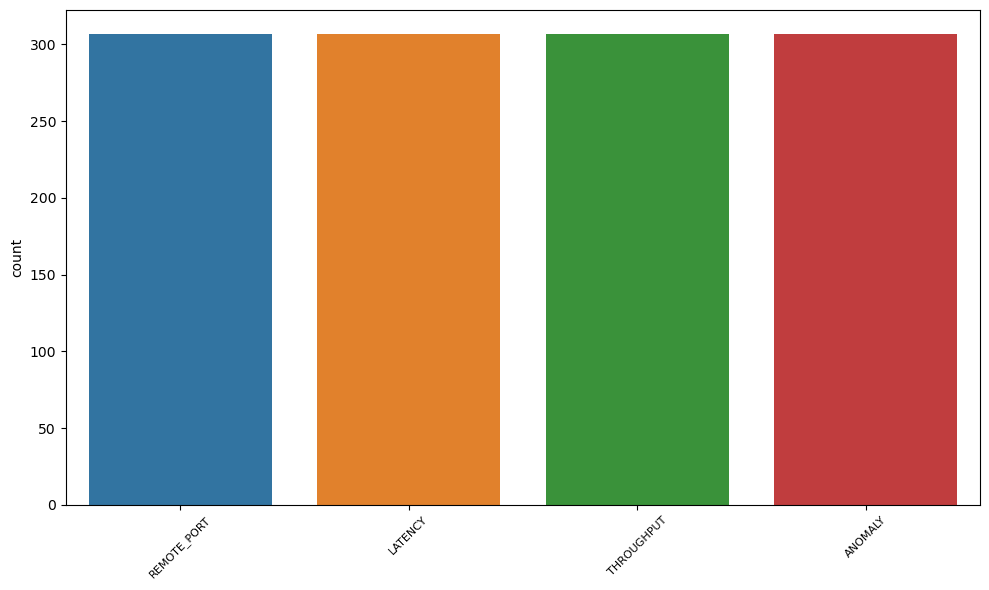

In [27]:
#Visualisation des distributions de fréquences
# Créer une nouvelle figure avec une taille personnalisée
plt.figure(figsize=(10, 6))  # 10 pouces de largeur, 6 pouces de hauteur

# Visualisation des distributions de fréquences avec un espace de 1 cm entre les bandes
sns.countplot(df)
plt.subplots_adjust(hspace=1.0)  # Espacement de 1 cm entre les bandes

# Faire pivoter les étiquettes à 45 degrés
plt.xticks(rotation=45)

# Réduire la taille de police des étiquettes
plt.xticks(fontsize=8)

# Ajuster l'espacement entre les étiquettes
plt.tight_layout()
# Afficher le graphique
plt.show()

In [28]:
# Séparation des features de la target (ANOMALY)
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [29]:
# # Standardisation des caractéristiques
# scaler = StandardScaler()
# features_scaled = scaler.fit_transform(X)

In [30]:
# Diviser le dataset en données d'entrainement et de test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=31)

In [31]:
# Entrainement des modèles
# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

In [32]:
# Prédiction avec les modèles
# KNN
knn_pred = knn_model.predict(X_test)

# Decision Tree
dt_pred = dt_model.predict(X_test)

# Naive Bayes
nb_pred = dt_model.predict(X_test)

In [33]:
# Évaluation des performances des modèles
# KNN
knn_accuracy = accuracy_score(Y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)
print(classification_report(Y_test, knn_pred))

# Decision Tree
dt_accuracy = accuracy_score(Y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(Y_test, dt_pred))

# Naive Bayes
nb_accuracy = accuracy_score(Y_test, dt_pred)
print("Naive Bayes Accuracy:", dt_accuracy)
print(classification_report(Y_test, dt_pred))

KNN Accuracy: 0.978494623655914
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        91
           1       0.00      0.00      0.00         2

    accuracy                           0.98        93
   macro avg       0.49      0.50      0.49        93
weighted avg       0.96      0.98      0.97        93

Decision Tree Accuracy: 0.989247311827957
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        91
           1       1.00      0.50      0.67         2

    accuracy                           0.99        93
   macro avg       0.99      0.75      0.83        93
weighted avg       0.99      0.99      0.99        93

Naive Bayes Accuracy: 0.989247311827957
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        91
           1       1.00      0.50      0.67         2

    accuracy                           0.99        93
   macro avg  

C:\Users\mcher\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mcher\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mcher\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\mcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='ANOMALY', ylabel='count'>

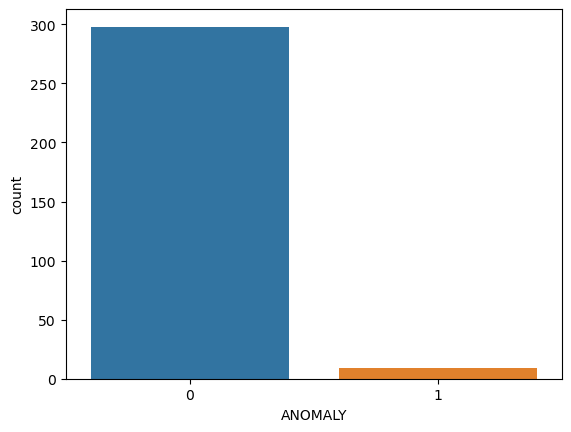

In [34]:
# Distribution de la variable cible "ANOMALY"
sns.countplot(x='ANOMALY', data=df)

In [43]:
print("Anomalies detectées:",len(df[df["ANOMALY"]==1]))
print("Normales :",len(df[df["ANOMALY"]==0]))

Anomalies detectées: 9
Normales : 298


<p><u>Commentaires</u></p>
<p> D'après les résultats fournis, voici une analyse comparative des performances des trois algorithmes de machine learning (KNN, arbre de décision et Naive Bayes) pour la détection de botnets :

<u> Précision (Precision) </u> :
KNN a une précision de 0.98 pour la classe 0 et une précision de 0.00 pour la classe 1.
L'arbre de décision et le modèle Naive Bayes ont tous deux une précision de 0.99 pour la classe 0 et une précision de 1.00 pour la classe 1.
Dans l'ensemble, tous les algorithmes ont une précision élevée pour la classe majoritaire (0), mais l'arbre de décision et Naive Bayes obtiennent également une précision parfaite pour la classe minoritaire (1).

<u> Rappel (Recall) </u> :
KNN a un rappel de 1.00 pour la classe 0 et un rappel de 0.00 pour la classe 1.
L'arbre de décision et le modèle Naive Bayes ont tous deux un rappel de 1.00 pour la classe 0 et un rappel de 0.50 pour la classe 1.
Le rappel mesure la capacité d'un modèle à identifier correctement les instances de chaque classe. Les performances de l'arbre de décision et de Naive Bayes sont similaires, mais KNN n'identifie pas correctement les instances de la classe 1.

<u> F1-Score </u> :
Le score F1 combine la précision et le rappel en une seule métrique. Il est calculé comme la moyenne harmonique de la précision et du rappel.
Les scores F1 pour KNN, l'arbre de décision et Naive Bayes sont tous élevés pour la classe majoritaire (0), mais l'arbre de décision et Naive Bayes obtiennent également des scores élevés pour la classe minoritaire (1).

<u> Accuracy (Exactitude) </u> :
Tous les algorithmes ont une précision globale élevée, avec une accuracy de 0.98 pour KNN, et de 0.99 pour l'arbre de décision et Naive Bayes.
L'accuracy mesure la proportion d'instances correctement classées par le modèle. </p>

<u> Remarque </u>
<p> Nous constatons que les algorithmes de Naive Bayes et d'arbre de décision sont plus performants car ils s'adaptent aux données indépendamment de la standardisation. Ce que le modèle KNN gère moins bien que les algorithmes de Naive Bayes et d'arbre de décision. </p>